## NBA all-star classification

### Features
- Season -- If listed as single number, the year the season ended.
- AllStar - Indicates All-Star for league.
- Only on regular season tables.
- Age -- Player's age on February 1 of the season
- Tm -- Team
- Lg -- League
- Pos -- Position
- G -- Games
- GS -- Games Started
- MP -- Minutes Played Per Game
- FG -- Field Goals Per Game
- FGA -- Field Goal Attempts Per Game
- FG% -- Field Goal Percentage
- 3P -- 3-Point Field Goals Per Game
- 3PA -- 3-Point Field Goal Attempts Per Game
- 3P% -- 3-Point Field Goal Percentage
- 2P -- 2-Point Field Goals Per Game
- 2PA -- 2-Point Field Goal Attempts Per Game
- 2P% -- 2-Point Field Goal Percentage
- eFG% -- Effective Field Goal Percentage
    - This statistic adjusts for the fact that a 3-point field goal is worth one more point than a 2-point field goal.
- FT -- Free Throws Per Game
- FTA -- Free Throw Attempts Per Game
- FT% -- Free Throw Percentage
- ORB -- Offensive Rebounds Per Game
- DRB -- Defensive Rebounds Per Game
- TRB -- Total Rebounds Per Game
- AST -- Assists Per Game
- STL -- Steals Per Game
- BLK -- Blocks Per Game
- TOV -- Turnovers Per Game
- PF -- Personal Fouls Per Game
- PTS -- Points Per Game

### Import

In [35]:
import missingno as msno
from sklearn.impute import SimpleImputer

In [32]:
nba_df = pd.read_csv('nba_data.csv')
nba_df

,index,Player,AllStar,Season,age,Team,League,Pos,G,GS,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,Alaa Abdelnaby,0,1990,22,POR,NBA,PF,43,0,...,.568,0.6,1.4,2.1,0.3,-,0.3,0.5,0.9,3.1
1,1,Alaa Abdelnaby,0,1991,23,POR,NBA,PF,71,1,...,.752,1.1,2.5,3.7,0.4,-,0.2,0.9,1.9,6.1
2,2,Alaa Abdelnaby,0,1992,24,TOT,NBA,PF,75,52,...,.759,1.7,2.8,4.5,0.4,-,0.3,1.3,2.5,7.7
3,3,Alaa Abdelnaby,0,1992,24,MIL,NBA,PF,12,0,...,.750,1.0,2.1,3.1,0.8,-,0.3,1.1,2.0,5.3
4,4,Alaa Abdelnaby,0,1992,24,BOS,NBA,PF,63,52,...,.760,1.8,3.0,4.8,0.3,-,0.3,1.3,2.6,8.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24517,18260,George Zídek,0,1997,24,SEA,NBA,C,6,0,...,1.000,0.0,0.7,0.7,0.2,-,0.0,0.2,0.8,1.8
24518,18261,Derrick Zimmerman,0,2005,24,NJN,NBA,PG,2,0,...,-,0.5,1.5,2.0,3.5,-,0.0,2.0,2.0,2.0
24519,18262,Jim Zoet,0,1982,29,DET,NBA,C,7,0,...,-,0.4,0.7,1.1,0.1,-,0.4,0.6,1.3,0.3
24520,18263,Bill Zopf,0,1970,22,MIL,NBA,PG,53,-,...,.556,-,-,0.9,1.4,-,-,-,0.6,2.2


In [39]:
nba_df.drop(['STL'], axis=1, inplace=True)

### Null data

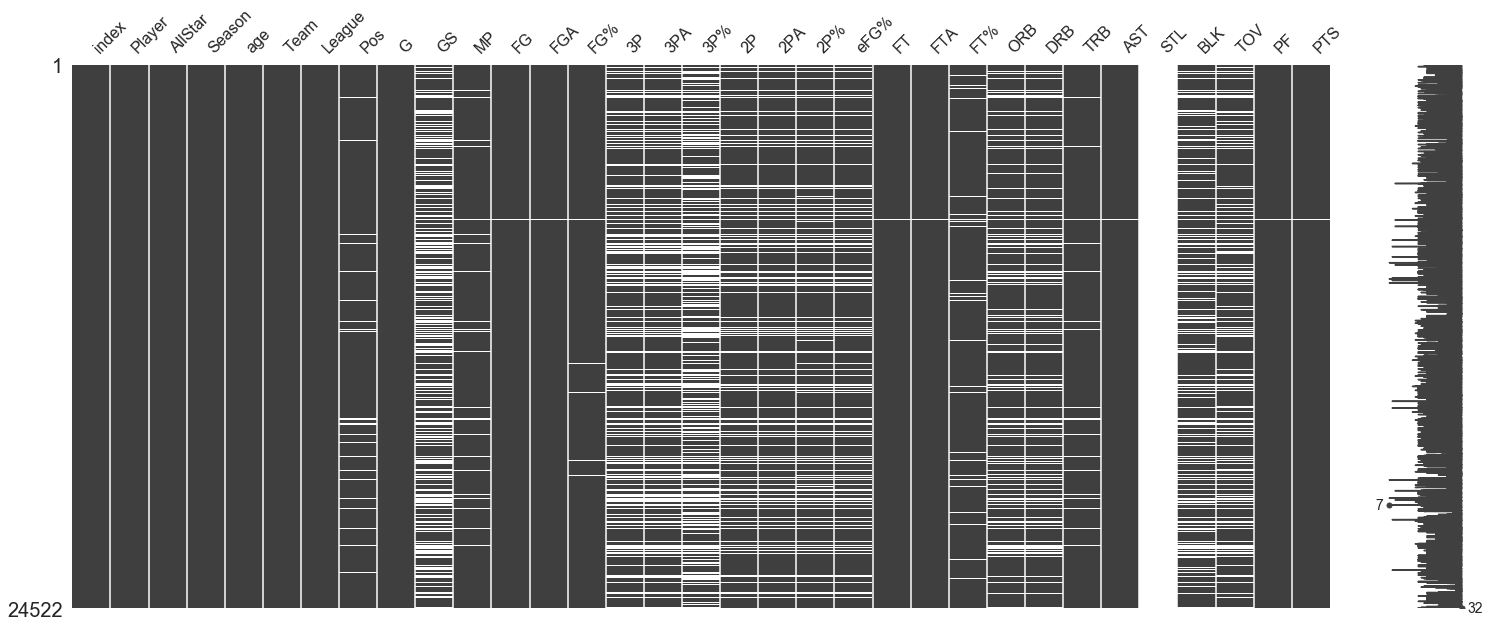

In [38]:
msno.matrix(nba_df)
plt.show()

### Delete null Position data

In [47]:
nba_df = nba_df[nba_df['Pos'].isnull() != True]
nba_df

,index,Player,AllStar,Season,age,Team,League,Pos,G,GS,...,FTA,FT%,ORB,DRB,TRB,AST,BLK,TOV,PF,PTS
0,0,Alaa Abdelnaby,0,1990,22,POR,NBA,PF,43,0,...,1.0,.568,0.6,1.4,2.1,0.3,0.3,0.5,0.9,3.1
1,1,Alaa Abdelnaby,0,1991,23,POR,NBA,PF,71,1,...,1.4,.752,1.1,2.5,3.7,0.4,0.2,0.9,1.9,6.1
2,2,Alaa Abdelnaby,0,1992,24,TOT,NBA,PF,75,52,...,1.5,.759,1.7,2.8,4.5,0.4,0.3,1.3,2.5,7.7
3,3,Alaa Abdelnaby,0,1992,24,MIL,NBA,PF,12,0,...,1.3,.750,1.0,2.1,3.1,0.8,0.3,1.1,2.0,5.3
4,4,Alaa Abdelnaby,0,1992,24,BOS,NBA,PF,63,52,...,1.6,.760,1.8,3.0,4.8,0.3,0.3,1.3,2.6,8.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24516,18259,George Zídek,0,1997,24,DEN,NBA,C,6,0,...,2.0,.833,0.7,1.5,2.2,0.2,0.3,0.5,0.8,3.0
24517,18260,George Zídek,0,1997,24,SEA,NBA,C,6,0,...,0.7,1.000,0.0,0.7,0.7,0.2,0.0,0.2,0.8,1.8
24518,18261,Derrick Zimmerman,0,2005,24,NJN,NBA,PG,2,0,...,0.0,NaN,0.5,1.5,2.0,3.5,0.0,2.0,2.0,2.0
24519,18262,Jim Zoet,0,1982,29,DET,NBA,C,7,0,...,0.0,NaN,0.4,0.7,1.1,0.1,0.4,0.6,1.3,0.3


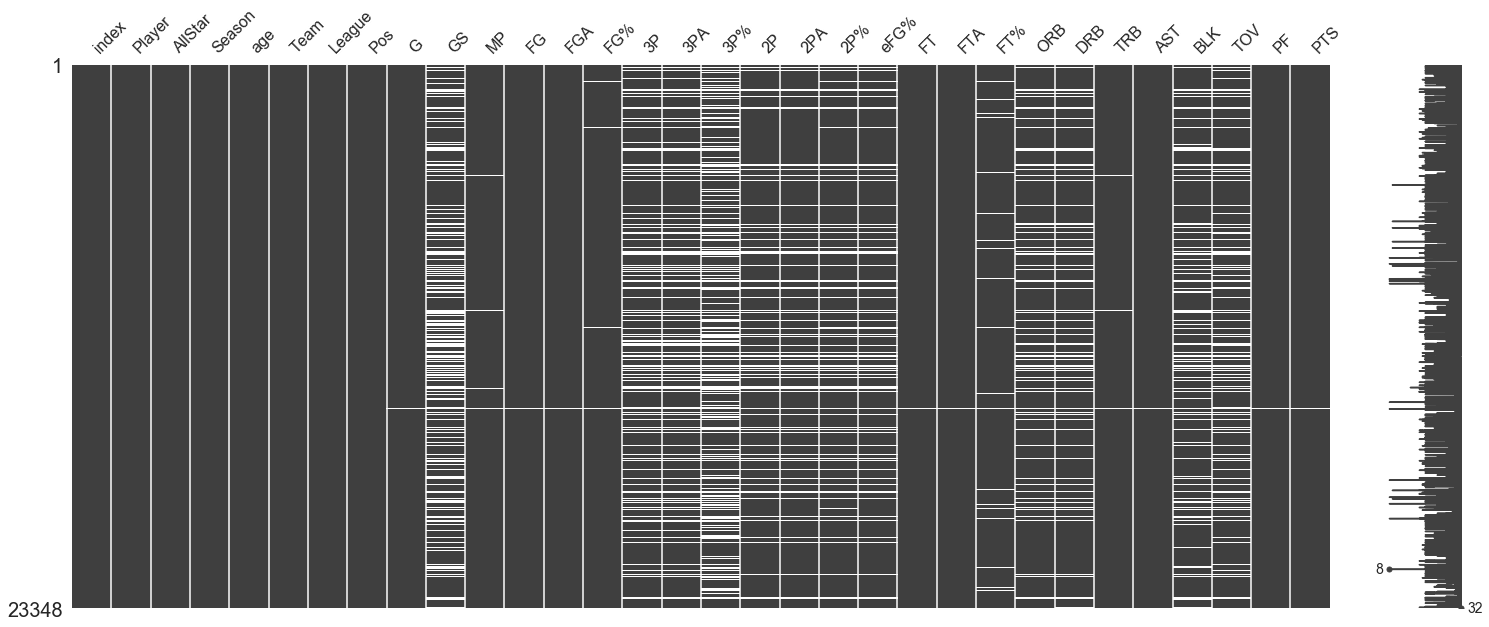

In [48]:
msno.matrix(nba_df)

### Replace '-' value to 0

In [49]:
nba_df.replace(np.nan, 0, inplace=True)

In [50]:
nba_df

,index,Player,AllStar,Season,age,Team,League,Pos,G,GS,...,FTA,FT%,ORB,DRB,TRB,AST,BLK,TOV,PF,PTS
0,0,Alaa Abdelnaby,0,1990,22,POR,NBA,PF,43,0,...,1.0,.568,0.6,1.4,2.1,0.3,0.3,0.5,0.9,3.1
1,1,Alaa Abdelnaby,0,1991,23,POR,NBA,PF,71,1,...,1.4,.752,1.1,2.5,3.7,0.4,0.2,0.9,1.9,6.1
2,2,Alaa Abdelnaby,0,1992,24,TOT,NBA,PF,75,52,...,1.5,.759,1.7,2.8,4.5,0.4,0.3,1.3,2.5,7.7
3,3,Alaa Abdelnaby,0,1992,24,MIL,NBA,PF,12,0,...,1.3,.750,1.0,2.1,3.1,0.8,0.3,1.1,2.0,5.3
4,4,Alaa Abdelnaby,0,1992,24,BOS,NBA,PF,63,52,...,1.6,.760,1.8,3.0,4.8,0.3,0.3,1.3,2.6,8.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24516,18259,George Zídek,0,1997,24,DEN,NBA,C,6,0,...,2.0,.833,0.7,1.5,2.2,0.2,0.3,0.5,0.8,3.0
24517,18260,George Zídek,0,1997,24,SEA,NBA,C,6,0,...,0.7,1.000,0.0,0.7,0.7,0.2,0.0,0.2,0.8,1.8
24518,18261,Derrick Zimmerman,0,2005,24,NJN,NBA,PG,2,0,...,0.0,0,0.5,1.5,2.0,3.5,0.0,2.0,2.0,2.0
24519,18262,Jim Zoet,0,1982,29,DET,NBA,C,7,0,...,0.0,0,0.4,0.7,1.1,0.1,0.4,0.6,1.3,0.3


In [51]:
nba_df.columns

Index(['index', 'Player', 'AllStar', 'Season', 'age', 'Team', 'League', 'Pos',
       'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'BLK',
       'TOV', 'PF', 'PTS'],
      dtype='object')

### Change object type to int type

In [54]:
nba_df[['MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'BLK', 'TOV', 'PF', 'PTS']] = nba_df[['MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'BLK', 'TOV', 'PF', 'PTS']].astype(str).astype(float)

In [55]:
nba_df[['Season', 'age', 'G', 'GS']] = nba_df[['Season', 'age', 'G', 'GS']].astype(int)

In [63]:
nba_df = nba_df.reset_index().drop(['level_0', 'index'], axis=1)

### Delete all other League players other than NBA

In [79]:
nba_df = nba_df[nba_df['League']=='NBA'].reset_index(drop=True)

### Describe dataset

In [84]:
nba_df.describe()

,AllStar,Season,age,G,GS,MP,FG,FGA,FG%,3P,...,FTA,FT%,ORB,DRB,TRB,AST,BLK,TOV,PF,PTS
count,21742.000000,21742.000000,21742.000000,21742.000000,21742.000000,21742.000000,21742.000000,21742.000000,21742.000000,21742.000000,...,21742.000000,21742.000000,21742.000000,21742.000000,21742.000000,21742.000000,21742.000000,21742.000000,21742.000000,21742.000000
mean,0.068163,1990.125517,26.958651,50.756646,16.522767,19.983645,3.157939,7.077872,0.429199,0.246251,...,2.243952,0.691173,0.895212,2.038543,3.703072,1.878797,0.338833,1.001053,2.050377,8.219938
std,0.252031,16.059621,3.861153,26.605477,26.222241,10.551056,2.330113,4.862766,0.099675,0.472138,...,1.885922,0.195032,0.894262,1.884605,2.893408,1.793250,0.495293,0.900622,0.928610,6.087987
min,0.000000,1949.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1979.000000,24.000000,27.000000,0.000000,11.225000,1.300000,3.200000,0.392000,0.000000,...,0.900000,0.642000,0.200000,0.700000,1.700000,0.600000,0.000000,0.200000,1.400000,3.500000
50%,0.000000,1993.000000,26.000000,57.000000,1.000000,19.100000,2.600000,5.900000,0.439000,0.000000,...,1.700000,0.736000,0.600000,1.600000,2.900000,1.300000,0.200000,0.800000,2.000000,6.600000
75%,0.000000,2003.000000,30.000000,76.000000,23.000000,28.700000,4.500000,9.900000,0.480000,0.300000,...,3.100000,0.804000,1.300000,2.900000,4.900000,2.600000,0.400000,1.500000,2.700000,11.600000
max,1.000000,2018.000000,44.000000,88.000000,83.000000,48.500000,20.000000,39.500000,1.000000,3.400000,...,17.000000,1.000000,7.200000,13.700000,27.200000,14.500000,5.600000,5.700000,6.000000,50.400000


In [92]:
nba_df.drop(['League', 'Team'], axis=1, inplace=True)

### AllStar Count

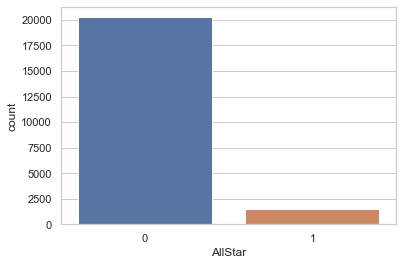

In [83]:
sns.countplot(x='AllStar', data=nba_df)

### Position Count

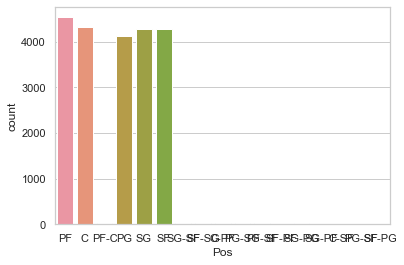

In [86]:
sns.countplot(x='Pos', data=nba_df)

In [93]:
nba_df

,Player,AllStar,Season,age,Pos,G,GS,MP,FG,FGA,...,FTA,FT%,ORB,DRB,TRB,AST,BLK,TOV,PF,PTS
0,Alaa Abdelnaby,0,1990,22,PF,43,0,6.7,1.3,2.7,...,1.0,0.568,0.6,1.4,2.1,0.3,0.3,0.5,0.9,3.1
1,Alaa Abdelnaby,0,1991,23,PF,71,1,13.2,2.5,5.1,...,1.4,0.752,1.1,2.5,3.7,0.4,0.2,0.9,1.9,6.1
2,Alaa Abdelnaby,0,1992,24,PF,75,52,17.5,3.3,6.3,...,1.5,0.759,1.7,2.8,4.5,0.4,0.3,1.3,2.5,7.7
3,Alaa Abdelnaby,0,1992,24,PF,12,0,13.3,2.2,4.7,...,1.3,0.750,1.0,2.1,3.1,0.8,0.3,1.1,2.0,5.3
4,Alaa Abdelnaby,0,1992,24,PF,63,52,18.3,3.5,6.6,...,1.6,0.760,1.8,3.0,4.8,0.3,0.3,1.3,2.6,8.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21737,George Zídek,0,1997,24,C,6,0,7.0,0.7,2.5,...,2.0,0.833,0.7,1.5,2.2,0.2,0.3,0.5,0.8,3.0
21738,George Zídek,0,1997,24,C,6,0,3.7,0.5,2.3,...,0.7,1.000,0.0,0.7,0.7,0.2,0.0,0.2,0.8,1.8
21739,Derrick Zimmerman,0,2005,24,PG,2,0,16.0,1.0,1.5,...,0.0,0.000,0.5,1.5,2.0,3.5,0.0,2.0,2.0,2.0
21740,Jim Zoet,0,1982,29,C,7,0,4.3,0.1,0.7,...,0.0,0.000,0.4,0.7,1.1,0.1,0.4,0.6,1.3,0.3
